# Variational Autoencoder

## Load Data

In [2]:
from keras import datasets
import numpy as np

(x_train, _), (x_test, _) = datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Model

In [3]:
from keras import layers
from keras import models
from keras import backend as K

In [4]:
input_img = layers.Input(shape=(28,28,1))

# encoding layers
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)

x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

x = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# decoding layers
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)

x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding ='same')(x)

x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(16, (3, 3), activation='relu')(x)

x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_____________________________________________________

## Compile

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## Learning

In [6]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5, # <- cpu problem using epochs = 50 
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2514 - val_loss: 0.1965
Epoch 2/5
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1817 - val_loss: 0.1697
Epoch 3/5
60000/60000 [==============================] - 145s 2ms/step - loss: 0.1663 - val_loss: 0.1605
Epoch 4/5
60000/60000 [==============================] - 158s 3ms/step - loss: 0.1579 - val_loss: 0.1537
Epoch 5/5
60000/60000 [==============================] - 148s 2ms/step - loss: 0.1519 - val_loss: 0.1502


## Running Autoencoder and Draw Result

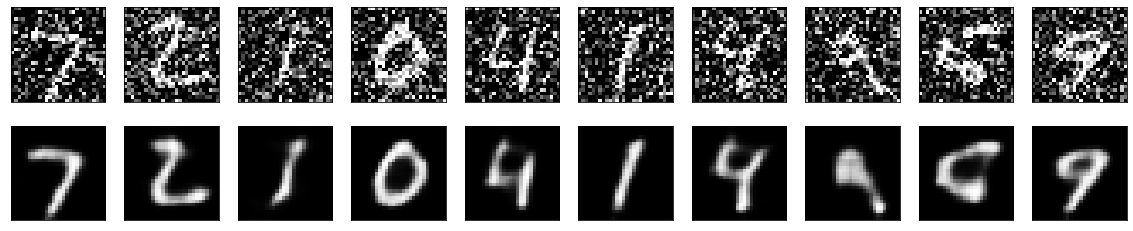

In [7]:
decoded_imgs = autoencoder.predict(x_test_noisy)
%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # result
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()